<p style="text-align: left; font-weight:bold; color:yellow; font-size: 24px">Dataset Specifications


***Link:*** https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset</br>

<p style="text-align: left; color:yellow; font-size: 18px">Target:<p>

**Diabetes_012:** 0 = no diabetes / 1 = prediabetes / 2 = diabetes

<p style="text-align: left; color:yellow; font-size: 18px">Attributes:<p>

**HighBP:** 0 = no high BP / 1 = high BP

**HighChol:** 0 = no high cholesterol / 1 = high cholesterol

**CholCheck:** 0 = no cholesterol check in 5 years / 1 = yes cholesterol check in 5 years

**BMI:** Body Mass Index

**Smoker:** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no / 1 = yes

**Stroke:** (Ever told) you had a stroke. 0 = no / 1 = yes

**HeartDiseaseorAttack:** coronary heart disease (CHD) or myocardial infarction (MI) 0 = no / 1 = yes

**PhysActivity:** physical activity in past 30 days - not including job 0 = no / 1 = yes

**Fruits:** Consume Fruit 1 or more times per day 0 = no / 1 = yes

**Veggies:** Consume Vegetables 1 or more times per day 0 = no / 1 = yes

**HvyAlcoholConsump:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no / 1 = yes

**AnyHealthcare:** Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no / 1 = yes

**NoDocbcCost:** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no / 1 = yes

**GenHlth:** Would you say that in general your health is: scale 1-5 / 1 = excellent / 2 = very good / 3 = good / 4 = fair / 5 = poor

**MentHlth:** Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how

**PhysHlth:** Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

**DiffWalk:** Do you have serious difficulty walking or climbing stairs? 0 = no / 1 = yes

**Sex:** 0 = female / 1 = male

**Age:** 13-level age category (_AGEG5YR see codebook) 1 = 18-24 / 9 = 60-64 / 13 = 80 or older

**Education:** Education level (EDUCA see codebook) scale 1-6 / 1 = Never attended school or only kindergarten / 2 = Grades 1 through 8

**Income:** Income scale (INCOME2 see codebook) scale 1-8 / 1 = less than $10,000 / 5 = less than $35,000 / 8 = $75,000 or more

<p style="text-align: left; font-weight:bold; color:yellow; font-size: 24px">EDA-Univariate & Multivariate Analysis <br/>

The objective of this project is to predict the occurrence of diabetes using 21 different attributes. These attributes collectively contribute to determining the target variable (Diabetes_012). Detailed descriptions of the target variable and each attribute can be found in the "dataset specification" section.</br>

The subsequent cell contains the code for reading the diabetes.csv file, plotting histograms, and displaying information pertaining to each variable. This includes the number of rows for each attribute and key statistical measures such as mean, standard deviation, minimum, maximum, first quartile, second quartile, and third quartile for all attributes.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("diabetes.csv")

# Display basic statistics of the dataset
print(df.describe())

       Diabetes_012        HighBP      HighChol     CholCheck           BMI  \
count  12684.000000  12684.000000  12684.000000  12684.000000  12684.000000   
mean       0.342636      0.470987      0.452539      0.962709     28.608168   
std        0.741899      0.499177      0.497762      0.189482      6.394928   
min        0.000000      0.000000      0.000000      0.000000     14.000000   
25%        0.000000      0.000000      0.000000      1.000000     24.000000   
50%        0.000000      0.000000      0.000000      1.000000     27.000000   
75%        0.000000      1.000000      1.000000      1.000000     32.000000   
max        2.000000      1.000000      1.000000      1.000000     85.000000   

             Smoker        Stroke  HeartDiseaseorAttack  PhysActivity  \
count  12684.000000  12684.000000          12684.000000  12684.000000   
mean       0.450252      0.049905              0.106512      0.733523   
std        0.497539      0.217758              0.308504      0.442134

The subsequent cell contains the code for plotting histograms of the target variable (Diabetes_012) and attributes. As outlined in the "dataset specification" section, most attribute values are either 0 or 1. Observing the histograms reveals a class imbalance among the target classes (Diabetes_012), which will be tackled in the "Class Imbalance Addressing" section.

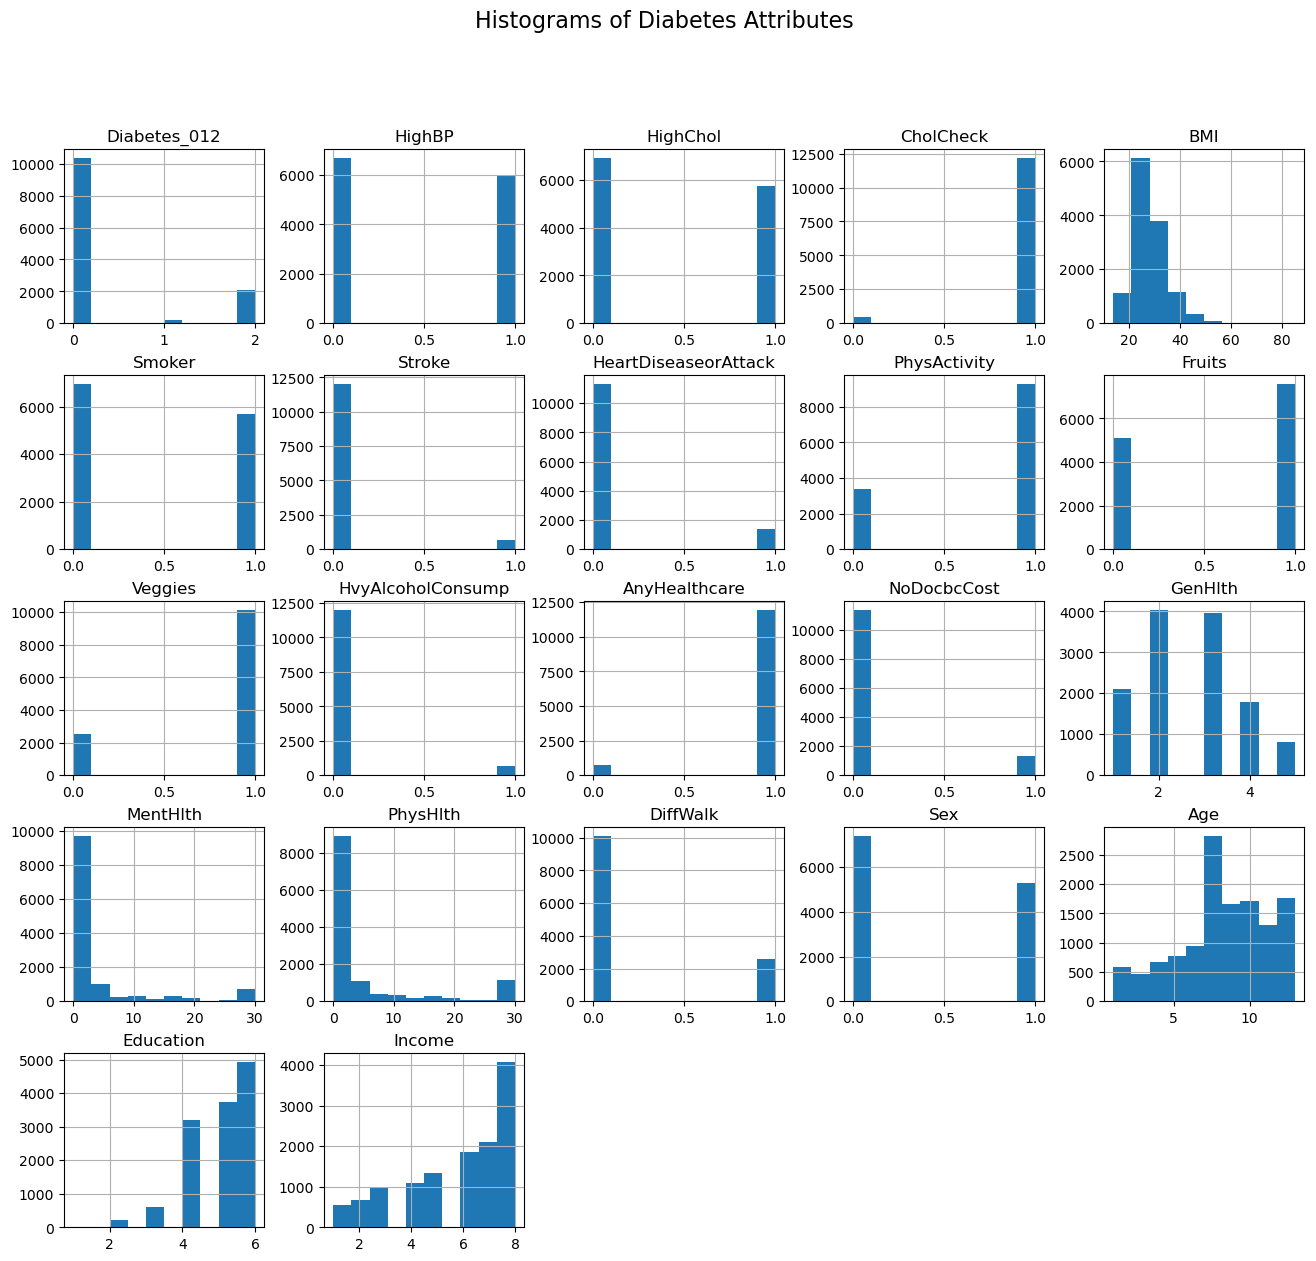

In [2]:
# Create histograms for each attribute
df.hist(figsize=(16, 14))
plt.suptitle("Histograms of Diabetes Attributes", fontsize=16)
plt.show()

The boxplot illustrating outliers for each attribute is presented in the subsequent result cell. Upon examining the histograms and boxplots from previous sections, it is evident that, aside from the target variable "Diabetes_012," most attributes are binary in nature. In a binary dataset where values are restricted to 0 and 1, the conventional notion of outliers loses its relevance. Outliers are typically identified as data points significantly deviating from the majority of the dataset. However, in a binary dataset, all data points are confined to either 0 or 1, thus precluding the presence of significant deviations. Consequently, the only attributes deemed to have potential outliers are as follows:

- "BMI"
- "GenHlth"
- "MentHlth"
- "PhysHlth"

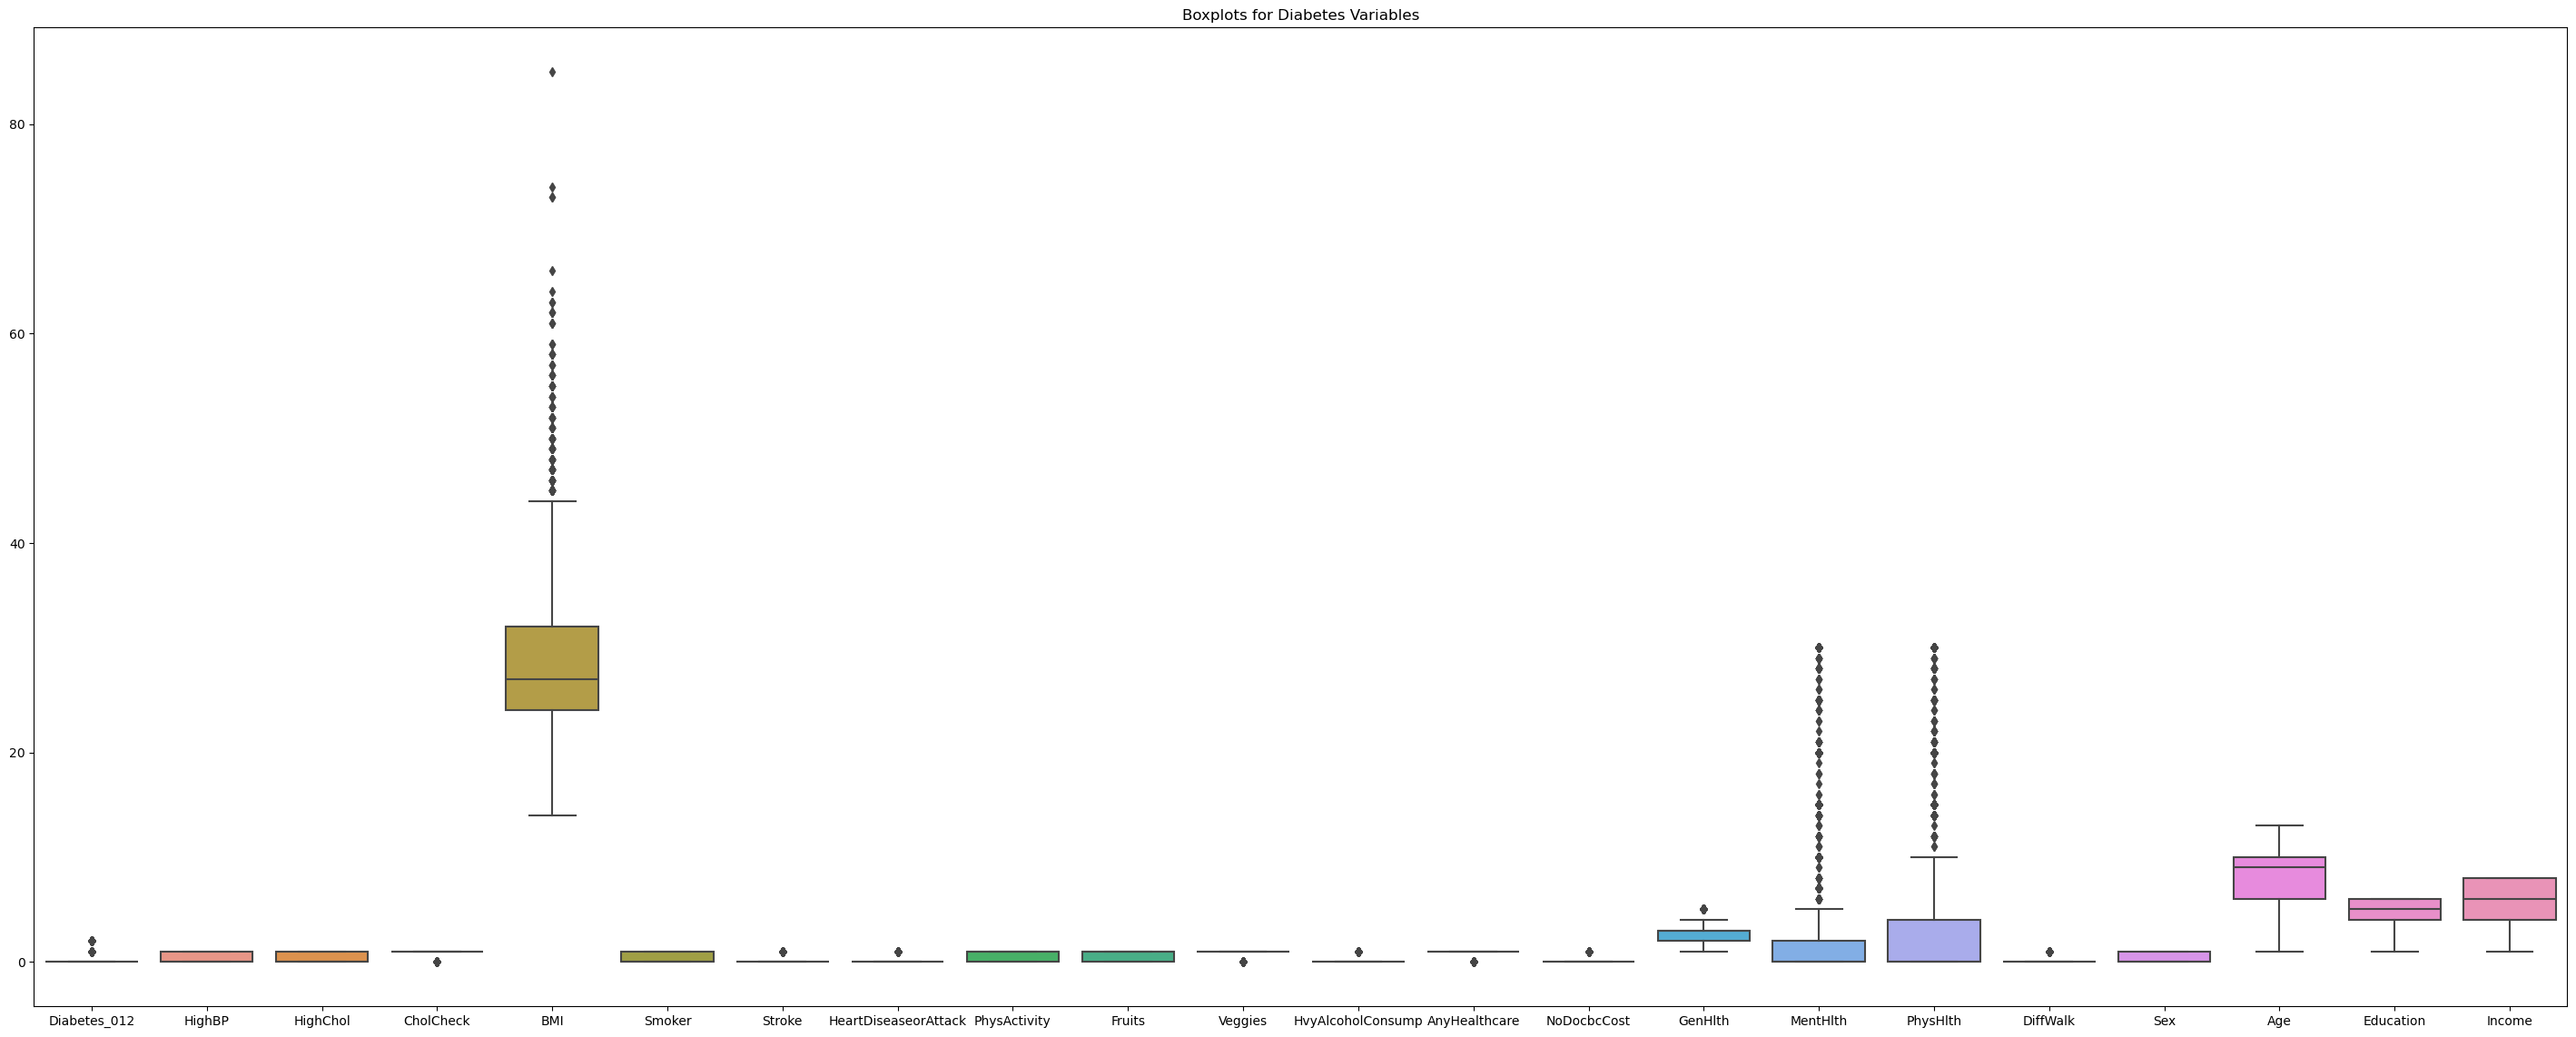

In [3]:
# Boxplots for potential outliers
plt.figure(figsize=(36, 14))
sns.boxplot(data=df)
plt.title("Boxplots for Diabetes Variables")
plt.show()

The code below generates a pair plot. The parameter 'diag_kind='kde'' indicates that kernel density estimates are to be displayed on the diagonal axes. These shapes, appearing along the diagonal, are line-based representations of histograms presented in a different format previously. When examining the scatter plots, an increase in dot density with increasing attribute values on both axes suggests a positive relationship between the attributes. Conversely, a decrease in dot density suggests a negative relationship. If the dot density neither increases nor decreases, it implies no significant relationship between the attributes. Please note that these observations are based on visual assessments and should be considered preliminary. They may not be as accurate as a more rigorous statistical analysis and should be viewed as rough interpretations.

/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is de

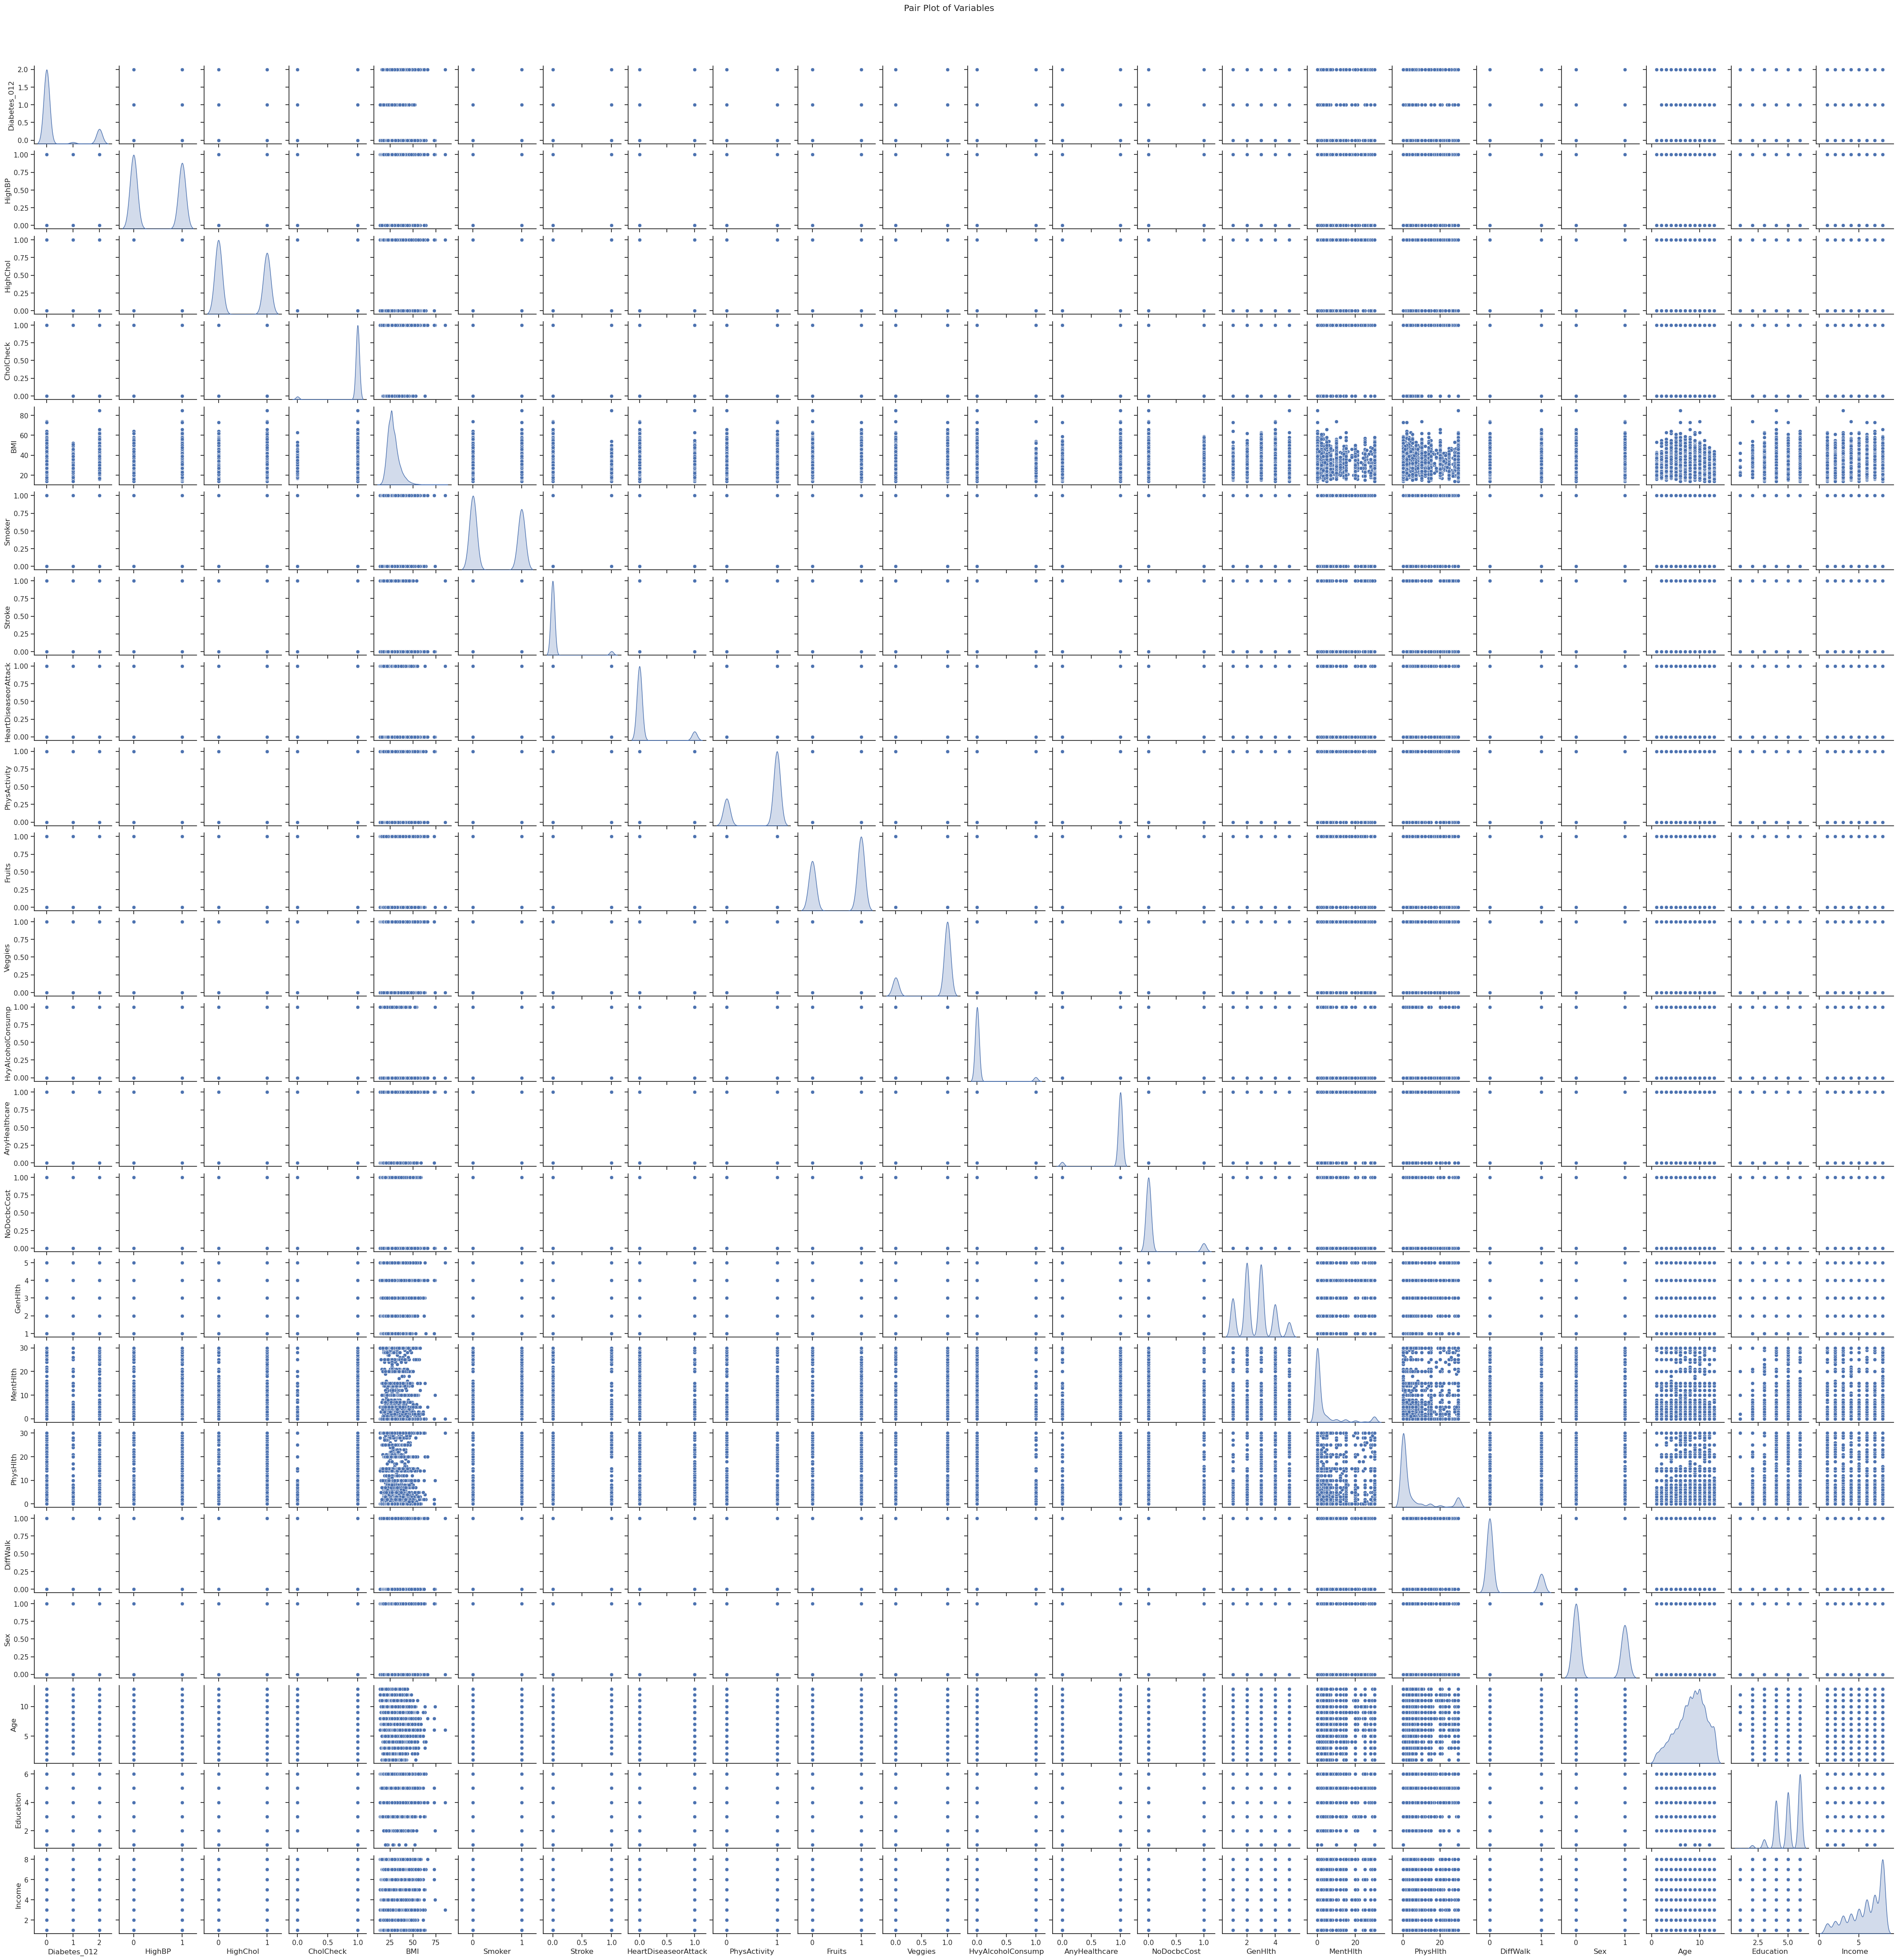

In [4]:
# Create a pair plot for variables
sns.set(style="ticks")
sns.pairplot(df, height=2, diag_kind='kde')
plt.suptitle('Pair Plot of Variables', y=1.02)
plt.show()

The code in the cell below conducts a correlation analysis. It utilizes the 'corr(method='pearson')' function from the Pandas library to compute the correlation between columns in a DataFrame using the Pearson method. Subsequently, the 'sns.heatmap()' function from the Seaborn library is employed to create the heatmap. In the generated heatmap, a red color (1.0) indicates a strong positive linear relationship between two attributes, while values closer to zero (blue color) suggest no linear trend between the attributes.

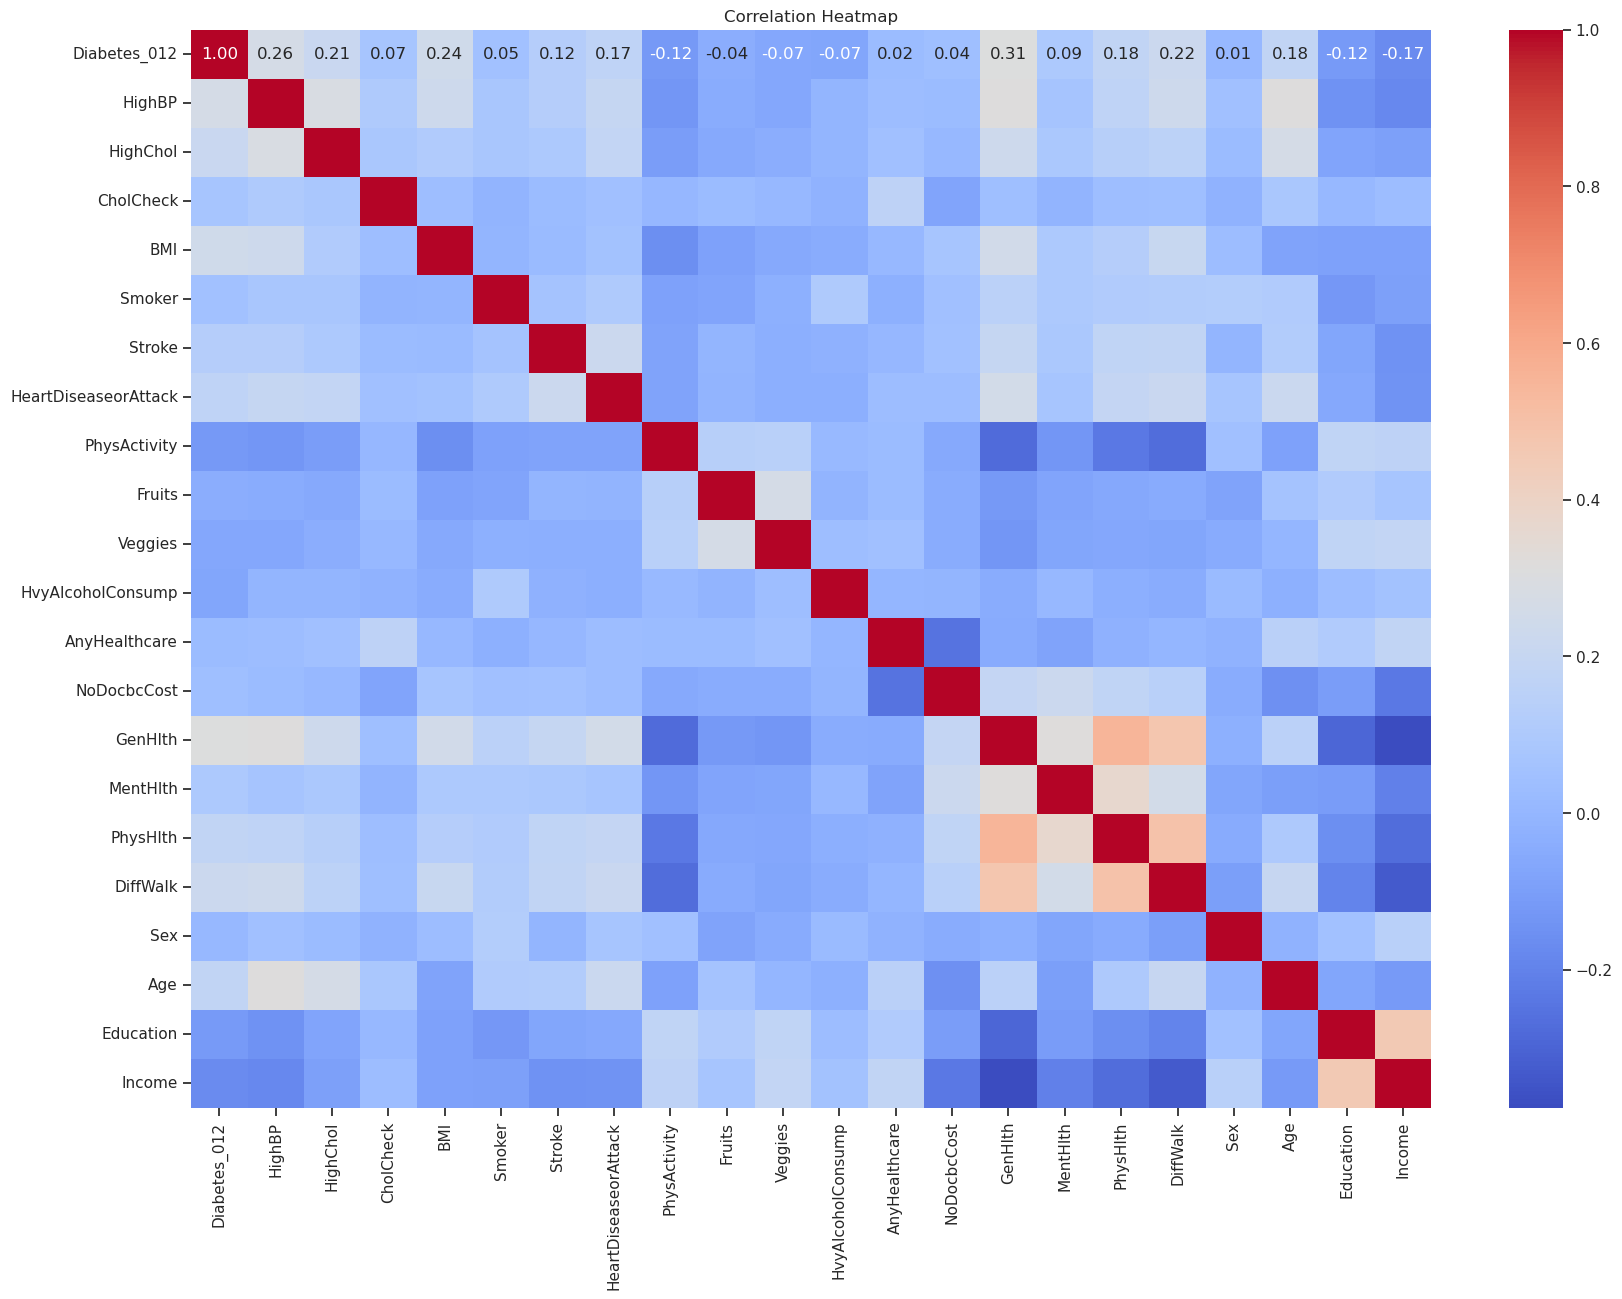

In [5]:
# Heatmap for correlation
plt.figure(figsize=(20, 14))
corr_matrix = df.corr(method ='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

<p style="text-align: left; font-weight:bold; color:yellow; font-size: 24px">Data preparation<br/>

Upon executing the provided code in the subsequent cell, duplicate rows in the DataFrame are eliminated, resulting in a unique DataFrame. Upon reviewing the provided information, it is noted that the initial DataFrame contained 12,684 rows, while the DataFrame after removing duplicates comprises 12,561 rows. This suggests the presence of 123 duplicated rows in the DataFrame.

It is noteworthy that the original dataset, which is accessible via the link above, has been truncated to 5 percent. This decision was made due to excessively long processing times when performing the models, which caused multiple crashes in the RAM of our personal devices and the software kernel.

In [6]:
# Remove duplicate rows
df = df.drop_duplicates(keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12561 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          12561 non-null  int64
 1   HighBP                12561 non-null  int64
 2   HighChol              12561 non-null  int64
 3   CholCheck             12561 non-null  int64
 4   BMI                   12561 non-null  int64
 5   Smoker                12561 non-null  int64
 6   Stroke                12561 non-null  int64
 7   HeartDiseaseorAttack  12561 non-null  int64
 8   PhysActivity          12561 non-null  int64
 9   Fruits                12561 non-null  int64
 10  Veggies               12561 non-null  int64
 11  HvyAlcoholConsump     12561 non-null  int64
 12  AnyHealthcare         12561 non-null  int64
 13  NoDocbcCost           12561 non-null  int64
 14  GenHlth               12561 non-null  int64
 15  MentHlth              12561 non-null  int64
 16  PhysHlth 

Based on the results from the preceding cell, it is evident from the "Non-Null" column that there are no null values present in any attribute. This observation is verified by running the subsequent code cell. Subsequently, to guarantee the removal of any missing values from the DataFrame, the dropna() function is executed.

In [7]:
# Check for missing values
pd.isnull(df).sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12561 entries, 0 to 12683
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_012          12561 non-null  int64
 1   HighBP                12561 non-null  int64
 2   HighChol              12561 non-null  int64
 3   CholCheck             12561 non-null  int64
 4   BMI                   12561 non-null  int64
 5   Smoker                12561 non-null  int64
 6   Stroke                12561 non-null  int64
 7   HeartDiseaseorAttack  12561 non-null  int64
 8   PhysActivity          12561 non-null  int64
 9   Fruits                12561 non-null  int64
 10  Veggies               12561 non-null  int64
 11  HvyAlcoholConsump     12561 non-null  int64
 12  AnyHealthcare         12561 non-null  int64
 13  NoDocbcCost           12561 non-null  int64
 14  GenHlth               12561 non-null  int64
 15  MentHlth              12561 non-null  int64
 16  PhysHlth 

Upon examining the histograms and boxplots presented in previous sections, it is evident that, except for the target attribute "Diabetes_012," most attributes are binary in form. In a binary dataset where values are restricted to 0 and 1, the traditional concept of outliers doesn't apply. Outliers are typically defined as data points significantly different from the majority of the dataset. However, in a binary dataset, all data points are either 0 or 1, thus none of them can be significantly different from the others. Therefore, the only attributes with potential outliers are considered as follows:

- "BMI"
- "GenHlth"
- "MentHlth"
- "PhysHlth"

The subsequent cell contains the code for handling outliers. A function named treat_outliers() is defined to firstly identify the outliers outside the range [lower_limit, upper_limit], and then replace them with the median value. It is decided to replace the outliers with median values, as it is a common practice in outlier handling methods. Considering the non-normal distribution of all attributes as observed in previous section drawings, the median, rather than the mean, has been selected as the replacement value.

Upon inspecting the resulting boxplot, it is observed that the outliers are nearly handled perfectly.

However, after replacing the remaining outliers with median values, there are still some outliers, as evident in the following boxplot. Two reasons could explain this:

1. The replacement values themselves may sometimes be extreme enough to be considered as outliers. If the median values used for replacement are close to the lower or upper limits, they could still appear as outliers in the boxplot.
2. The boxplot might display points that are extreme relative to the interquartile range (IQR), even though they fall within the acceptable range defined by the code.

Furthermore, it is worth mentioning that outliers for the "GenHlth" attribute have been completely removed.

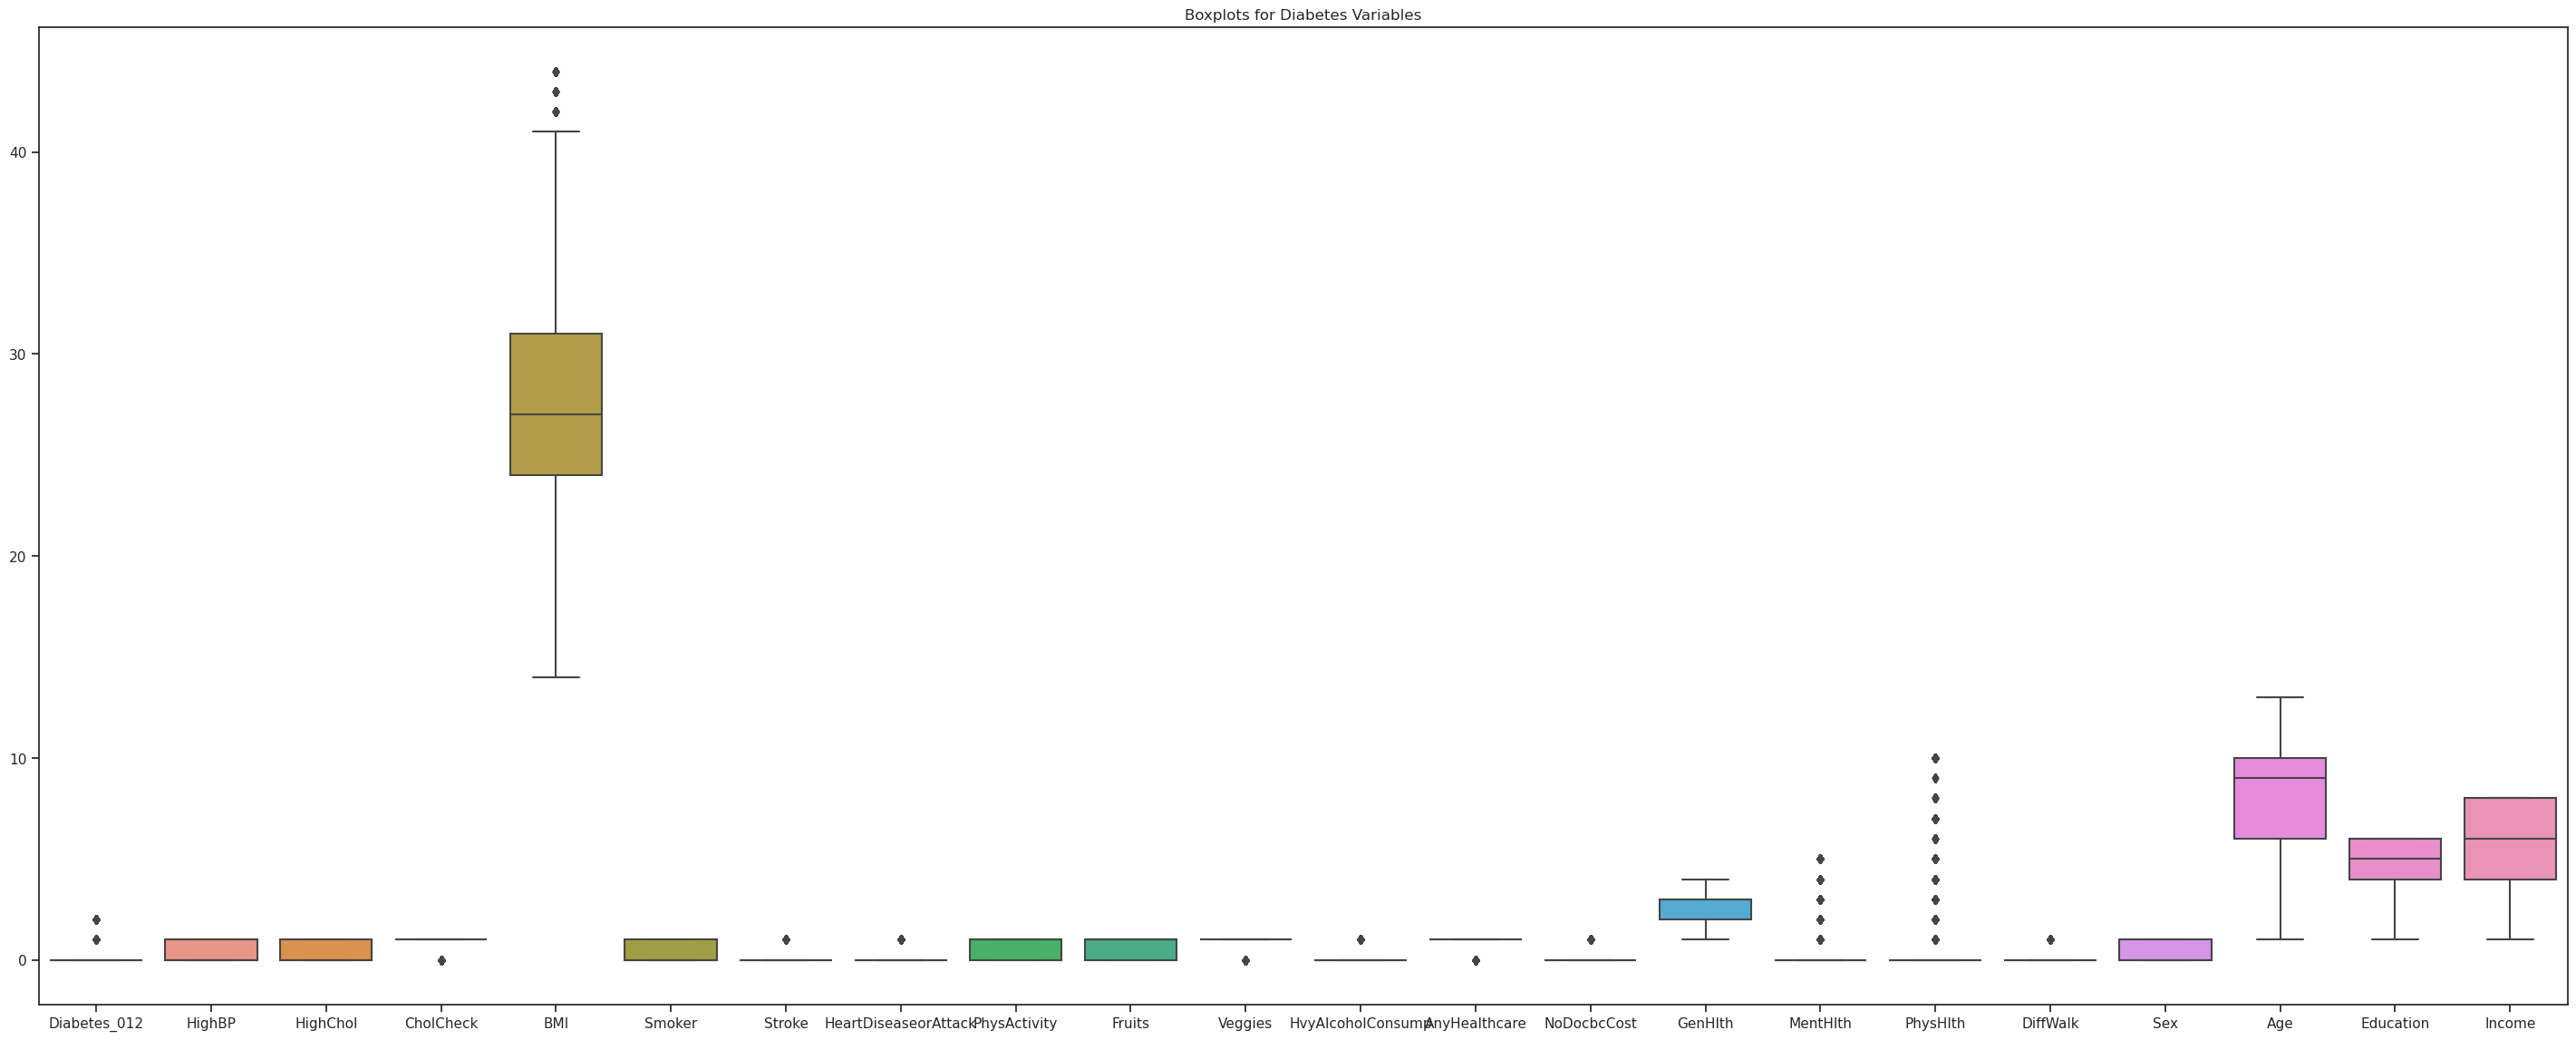

In [9]:
# Replace the outlier values with the Median of that attribute

import pandas as pd
import numpy as np

# Function to detect and replace outliers with the median
def treat_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Define limits for outliers
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        # Find the median
        median = df[col].median()

        # Replace outliers with median
        df.loc[(df[col] < lower_limit) | (df[col] > upper_limit), col] = median

    return df

# Specify the columns to check for outliers
columns = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth']

# Apply the function to the DataFrame
df = treat_outliers(df, columns)


# Boxplots for potential outliers
plt.figure(figsize=(36, 14))
sns.boxplot(data=df)
plt.title("Boxplots for Diabetes Variables")
plt.show()

Another essential step in preprocessing a DataFrame is scaling the data. This process is considered crucial in many machine learning algorithms due to several reasons:

1. Improved Algorithm Performance: Various machine learning algorithms, such as deep learning models, tend to perform better when their input data is scaled. These algorithms are sensitive to the range of the data and may exhibit bias towards variables with larger ranges.

2. Faster Convergence: Gradient descent, a common optimization technique used in many machine learning algorithms, converges more rapidly when the attributes are on similar scales. This is because the gradients with respect to these attributes will descend at comparable rates.

3. Avoiding Numerical Instability: Certain algorithms may encounter numerical instability issues due to the effects of extremely large or small numbers. Scaling can help mitigate these issues by bringing the data to a more manageable range.

4. Interpretability: When attributes are on the same scale, it becomes easier to compare the coefficients of a linear model or the attribute importances of a tree-based model, thereby enhancing interpretability.

It is important to note that standardizing binary attributes (0 and 1) may not be beneficial, as it could potentially make the data less interpretable.

Based on the explanations above, scaling is applied to non-binary columns.

In [10]:
#Import the required library
from sklearn.preprocessing import StandardScaler

# Create a copy of the original DataFrame
df_scaled = df.copy()

# Specify the target and attributes
X = df_scaled.drop(columns=['Diabetes_012'])  # attributes
y = df_scaled['Diabetes_012']  # target

# Non-binary columns
non_binary_cols = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Initialize the StandardScaler
scaler = StandardScaler()

# Iterate over each non-binary column in the DataFrame
for column in non_binary_cols:
    # Reshape the data because fit_transform expects 2D array
    X[column] = scaler.fit_transform(X[column].values.reshape(-1,1))

# Update the DataFrame with the scaled data
df_scaled[non_binary_cols] = X[non_binary_cols]

According to the output from the subsequent cell, it is apparent that some values do not fall within the range of [-1, 1]. This discrepancy arises because standard scaling is typically suitable for normally distributed values. However, in this study, none of the attribute values are normally distributed.

In [11]:
df_scaled.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,2.195373,1,0,0,0,0,...,1,0,0.539919,-0.384697,-0.441812,1,0,0.259849,-0.987561,-1.337824
1,0,0,0,0,-0.571773,1,0,0,1,0,...,0,1,0.539919,-0.384697,-0.441812,0,0,-0.406129,1.022119,-2.276984
2,0,1,1,1,-0.018343,0,0,0,0,1,...,1,1,0.539919,-0.384697,-0.441812,1,0,0.259849,-0.987561,1.010078
3,0,1,0,1,-0.202820,0,0,0,1,1,...,1,0,-0.540521,-0.384697,-0.441812,0,0,0.925826,-1.992401,0.070917
4,0,1,1,1,-0.756249,0,0,0,1,1,...,1,0,-0.540521,2.136438,-0.441812,0,0,0.925826,0.017279,-0.868243


<p style="text-align: left; color:yellow; font-size: 16px">Since the dataset under study is logically structured around binary values, there shouldn't be any issues with zero values. In fact, according to the definition outlined in the "dataset specification" section, zero values hold significance.

The following cell contains the necessary code for detecting the relationships among all attributes. To identify strong correlations, an absolute threshold of 0.5 is considered. Correlation coefficients can be positive or negative, indicating the direction of the relationship.

The correlation coefficient quantifies the strength and direction of a linear relationship between two variables, ranging from -1 to 1. A coefficient of -1 indicates a strong negative relationship, 1 indicates a strong positive relationship, and 0 suggests no relationship.

In the context of a machine learning model with a target variable and attributes, a low correlation coefficient suggests a weak linear relationship between the attribute and the target. However, this doesn't necessarily indicate an issue; it could signify a non-linear relationship or interaction with other features in predicting the target.

It's essential to note that correlation does not imply causation. Even if two variables are strongly correlated, it doesn't imply that changes in one variable cause changes in the other.

Furthermore, in the "feature engineering exploration" section, the lack of high correlation will be addressed and compensated by applying the Boruta algorithm.

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_scaled.corr(method="pearson")

# Display the correlation matrix
print(correlation_matrix)

# Check for high correlation (multicollinearity)
threshold = 0.5  # Define the threshold for high correlation (e.g., 0.5)
high_correlation_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))

# Display pairs of variables with high correlation
if high_correlation_pairs:
    print("\nPairs of variables with high correlation (above threshold):")
    for pair in high_correlation_pairs:
        print(pair)
else:
    print("\nNo pairs of variables have high correlation above the threshold.")

                      Diabetes_012    HighBP  HighChol  CholCheck       BMI  \
Diabetes_012              1.000000  0.262091  0.208907   0.072511  0.215853   
HighBP                    0.262091  1.000000  0.284095   0.106146  0.218007   
HighChol                  0.208907  0.284095  1.000000   0.082780  0.115653   
CholCheck                 0.072511  0.106146  0.082780   1.000000  0.035935   
BMI                       0.215853  0.218007  0.115653   0.035935  1.000000   
Smoker                    0.046495  0.071816  0.073013  -0.011421 -0.016403   
Stroke                    0.123286  0.122914  0.094198   0.022481  0.009671   
HeartDiseaseorAttack      0.169139  0.196148  0.186925   0.045455  0.054448   
PhysActivity             -0.116810 -0.128433 -0.099706   0.001262 -0.126597   
Fruits                   -0.040114 -0.041740 -0.053961   0.021129 -0.085735   
Veggies                  -0.064280 -0.065614 -0.040271   0.006368 -0.046695   
HvyAlcoholConsump        -0.072761 -0.010296 -0.0111

<p style="text-align: left; color:yellow; font-size: 18px">Addressing Class Imbalance <br/>

The following cell presents code to address the class imbalance within the three classes of the target variable.

Class imbalance is a common issue in machine learning, particularly in classification tasks where one class (in this case, class 0) dominates the dataset. Failure to handle class imbalance appropriately can result in a biased model. Various methods exist to address class imbalance:

1. Undersampling: This involves randomly removing samples from the majority class to rebalance the class distribution. However, this approach risks discarding potentially crucial data.

2. Oversampling: This involves randomly duplicating samples from the minority class to balance the class distribution. However, it may lead to overfitting due to the replication of data.

3. Synthetic Minority Over-sampling Technique (SMOTE): This technique generates synthetic samples from the minority class, effectively increasing the number of minority samples. SMOTE is a widely used method for addressing class imbalance.

Given the multi-class imbalance problem, the SMOTE technique has been applied to oversample the minority classes.

It's important to note that addressing class imbalance before checking for multicollinearity could introduce artificial multicollinearity into the dataset.

The balanced classes are depicted in the subsequent barplot.

Diabetes_012
0    10279
1    10279
2    10279
Name: count, dtype: int64


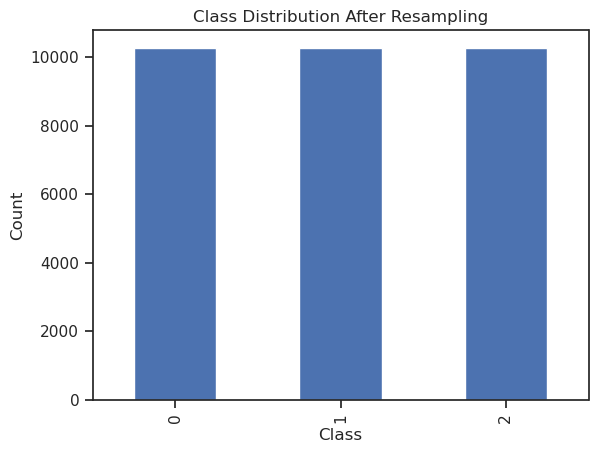

In [13]:
# Import required library
from imblearn.over_sampling import SMOTE

# Initialize SMOTE with 'not majority' sampling strategy
smote = SMOTE(sampling_strategy='not majority')

# Fit SMOTE
# drop the original target column from the features before applying SMOTE.
# This ensures that the target column doesn’t get duplicated in the final DataFrame.
X_resampled, y_resampled = smote.fit_resample(df_scaled.drop(columns=['Diabetes_012']), y)

# Combine X_resampled and y_resampled to create a new DataFrame
df_resampled = pd.concat([y_resampled, X_resampled], axis=1)

# Print the number of each class
class_counts = y_resampled.value_counts().sort_index()
print(class_counts)

# Plot a bar graph of the class distribution
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Resampling')
plt.show()

In [14]:
df_resampled

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,2.195373,1,0,0,0,0,...,1,0,0.539919,-0.384697,-0.441812,1,0,0.259849,-0.987561,-1.337824
1,0,0,0,0,-0.571773,1,0,0,1,0,...,0,1,0.539919,-0.384697,-0.441812,0,0,-0.406129,1.022119,-2.276984
2,0,1,1,1,-0.018343,0,0,0,0,1,...,1,1,0.539919,-0.384697,-0.441812,1,0,0.259849,-0.987561,1.010078
3,0,1,0,1,-0.202820,0,0,0,1,1,...,1,0,-0.540521,-0.384697,-0.441812,0,0,0.925826,-1.992401,0.070917
4,0,1,1,1,-0.756249,0,0,0,1,1,...,1,0,-0.540521,2.136438,-0.441812,0,0,0.925826,0.017279,-0.868243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30832,2,1,0,1,1.492584,1,0,0,0,1,...,1,0,0.539919,-0.384697,-0.441812,1,0,0.719609,1.022119,0.831304
30833,2,1,0,1,2.187375,0,0,0,0,0,...,1,0,1.620360,-0.384697,1.811559,1,0,0.925826,1.022119,0.070917
30834,2,0,0,1,0.520451,0,0,0,1,1,...,1,0,0.539919,2.169772,-0.441812,0,0,-0.073140,1.022119,0.089543
30835,2,1,1,1,-0.202820,0,0,0,1,0,...,1,0,0.225159,2.976817,-0.179226,0,0,-0.406129,1.022119,0.344519


The preprocessed dataset has been saved to be accessible in the next steps.

In [15]:
# Save the preprocesses dataset as preprovessed_data.csv
df_resampled.to_csv('preprocessed_data.csv', index=False)

### <p style="text-align: left; font-weight:bold; color:yellow; font-size: 24px">Modeling & Evaluation</br></br> (Naive Bays, RandomForest, VotingClassifier, Bagging, Deep Learning (MPL (feedforward))<br/>

The following cells demonstrate the process of reading the preprocessed dataset, specifying the target variable and attributes, and then splitting the dataset into training (80%) and testing (20%) sets.

In [16]:
# Read the preprocessed dataset
df=pd.read_csv('preprocessed_data.csv')

In [17]:
# Select the first column as the target column
target_column = df.columns[0]
target = df[target_column]

# Select the rest of the columns as features
attributes = df.drop(target_column, axis=1)

In [18]:
# Split dataset into train (80%) and test (20%) based on "target" and "features"

# Import library
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(attributes, target, test_size=0.2, random_state=42)


<p style="text-align: left; font-weight:bold; color:yellow; font-size: 18px">Feature Engineering Exploration <br/>

To enhance the predictive power of machine-learning models, the Boruta method has been applied. Boruta is a feature selection method based on random forests, offering several advantages:

1. Consideration of interactions between variables: Unlike some other feature selection methods that assess each feature individually, Boruta considers interactions between different features. This approach can result in more accurate feature importance rankings.

2. Provision of a statistical test for feature relevance: Boruta employs a statistical test to determine whether a feature is relevant or not. This method is often more robust than approaches that rely on a predefined threshold.

3. Compatibility with any type of features: Boruta can handle numerical, categorical, and ordinal features, making it versatile for various types of data.

In the following cell, BorutaPy is imported from the Boruta package, and certain numpy datatypes are redefined to avoid potential conflicts between different versions of numpy used in the project and the one used in Boruta. Next, the RandomForestRegressor is instantiated, which will be utilized by Boruta to rank the features. BorutaPy is initialized with the RandomForestRegressor, with the n_estimators parameter set to "auto" so that Boruta automatically determines the number of trees to use in the random forest. Additionally, a random state is set for reproducibility.

Subsequently, BorutaPy is fitted to the training data, where Boruta ranks the features. Finally, the selected features are extracted by indexing the DataFrame columns with boruta_selector.support_, which is a boolean mask indicating the features selected by Boruta. The boruta_selector is converted to a list and stored.

Apart from Boruta, there exist various other feature selection methods, including:

- Filter methods: These methods rank features based on statistical measures such as correlation or mutual information with the target variable. Examples include Pearson correlation and chi-square test.
- Wrapper methods: These methods assess subsets of features based on the performance of a particular model. Examples include recursive feature elimination and sequential feature selection.
- Embedded methods: These methods perform feature selection as part of the model training process.

For more information about Boruta, please visit the following link: [link to Boruta documentation].

***Link:*** https://github.com/scikit-learn-contrib/boruta_py 

In [19]:
# Select the best attributes for medel evaluation by Boruta

# Import libraries
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

np.int = np.int32
np.float = np.float64
np.bool = np.bool_

# n_jobs: the number of jobs to run in parallel for both fit and predict. If -1, then the number of jobs is set to the number of cores
# max_depth: the number of splits that each decision tree is allowed to make.
rf = RandomForestRegressor(n_jobs=-1, max_depth=5)
boruta_selector = BorutaPy(rf, n_estimators="auto", random_state=13)
boruta_selector.fit(X_train.values, y_train)

BorutaPy(estimator=RandomForestRegressor(max_depth=5, n_estimators=120,
                                         n_jobs=-1,
                                         random_state=RandomState(MT19937) at 0x7F12B617E340),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F12B617E340)

The outcome reveals that 15 attributes out of the initial 21 have been selected as important for predicting the target. Henceforth, the training and test sets of attributes will exclusively utilize these selected attributes, denoted as follows:

```python
X_train[selected_attributes]
```

```python
X_test[selected_attributes]
```

In [20]:
# Show the selected attributes
# tolist() --> is a function used to convert a given array objects to an ordinary list
selected_attributes = X_train.columns[boruta_selector.support_].tolist()
selected_attributes

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'PhysActivity',
 'Fruits',
 'Veggies',
 'HvyAlcoholConsump',
 'NoDocbcCost',
 'GenHlth',
 'DiffWalk',
 'Age',
 'Education',
 'Income']

<p style="text-align: left; font-weight:bold; color:yellow; font-size: 18px">Traditional Model Evaluation (Naive Bays & RandomForest)(Hyperparameter Tuning & Cross-Validation Included)

To evaluate performance, two predictive models based on classification, namely Naive Bayes and RandomForest classifiers, have been executed. Initially, Naive Bayes is assessed using cross-validation, as hyperparameter tuning is not applicable in this classification method. Subsequently, hyperparameter tuning and cross-validation are performed for the RandomForest classifier.

Cross-validation is a robust technique for evaluating model performance on independent data and detecting overfitting.

In all cases, K-fold cross-validation is applied, with the number of repeated folds set to 10 (cv=10), as is common practice.

For Naive Bayes, as there are typically no hyperparameters to tune, cross-validation is used to evaluate the model's performance. However, sklearn does not provide a straightforward method for performing cross-validation on a single model without hyperparameter tuning. Therefore, cross_val_score is utilized to evaluate the model's performance using cross-validation.

The cross_val_score function employs the scoring metric provided by the estimator's score method. For the GaussianNB classifier, this metric is the "mean accuracy" on the given test data and labels. The cross_val_score performs 10-fold cross-validation before the model is trained on the entire training set. The cross-validation scores provide insight into how well the model is expected to perform on unseen data.

The results are displayed after the subsequent cell. The range of a cross-validation score varies depending on the evaluation metric used. In this case, accuracy is the metric, and the cross-validation score can range from 0 to 1. A score of 0 indicates that the model did not correctly predict any outcomes, while a score of 1 indicates that the model correctly predicted all outcomes. With an average cross-validation score of 0.55, it is inferred that the model's performance is reasonably consistent and to some extent not affected by random variations in the training-test splits.

Additionally, the values of the performance metrics are printed out.

In [21]:
# Perform Naïve Bayes Classification, including 10-fols cross-validation and evaluate the performance

# Imort libraries
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Perform 10-fold cross validation
scores = cross_val_score(clf, X_train[selected_attributes], y_train, cv=10)

# Print cross-validation and average of class-validation scores
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

# Train the classifier
clf.fit(X_train[selected_attributes], y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test[selected_attributes])

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print the results
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Cross-validation scores:  [0.52452371 0.53627888 0.52047021 0.5139846  0.50304013 0.53465748
 0.52371301 0.50141873 0.52087556 0.51905921]
Average cross-validation score:  0.519802150758216
F1 Score: 0.5031280270496774
Precision: 0.5783846082200303
Recall: 0.5121595330739299
Accuracy: 0.5121595330739299


The following cell implements the RandomForest classification. This classifier is initialized with a fixed random state to ensure reproducibility. Subsequently, a dictionary of hyperparameters and their respective values is defined for the RandomForest classifier, namely 'n_estimators' (the number of trees in the forest) and 'max_depth' (the maximum depth of the tree).

Unlike the Naive Bayes method, where cross_val_score is applied, in RandomForest, since the hyperparameters are meaningful, the GridSearchCV object is initialized with the RandomForest classifier and the hyperparameter grid. The 'cv' parameter is set to 10, indicating the use of 10-fold cross-validation. The GridSearchCV object is then fitted to the training data, involving training a RandomForest classifier for each combination of hyperparameters in the grid and evaluating its performance using cross-validation. It tries out different combinations of the parameters specified in rf_param_grid for the RandomForest classifier. For each combination, it trains a model and evaluates its performance. The optimal hyperparameters are extracted from the GridSearchCV object, which are 'max_depth': None and 'n_estimators': 200. These parameters will be used in the subsequent steps for ensemble methods.

Additionally, the cross-validation scores for each hyperparameter combination are extracted and printed. The average cross-validation score for the best model, i.e., the model with the highest cross-validation score, is also printed.

The average cross-validation score, which is almost 0.91, shows a significant improvement compared to the Naive Bayes method, indicating that the model's performance is much more reliable.

Following the code, predictions are made on the test set using the RandomForest classifier with the optimal hyperparameters. This forces the RandomForest to perform at its best to generate performance metrics.

The performance of the classifier on the test set is evaluated using several metrics, including accuracy, F1 score, precision, and recall. These metrics are then printed. The improvement in all metrics is almost 40% compared to the Naive Bayes method.

In [22]:
# Perform Random Forest Classification, and evalute the performance

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters and their values for RandomForest
rf_param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30, 40]}

# Initialize the grid search object for RandomForest
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=10)

# Fit the grid search object to the data
grid_search_rf.fit(X_train[selected_attributes], y_train)

# Get the optimal hyperparameters
best_params_rf = grid_search_rf.best_params_

# Print the best parameters
print("Best parameters for RandomForest: ", best_params_rf)

# Get the cross-validation scores
cv_scores = grid_search_rf.cv_results_['mean_test_score']

# Print the cross-validation scores for each hyperparameter combination
print("Cross-validation scores for each hyperparameter combination: ", cv_scores)

# Print the average cross-validation score for the best model
print("Average cross-validation score for the best model: ", max(cv_scores))

# Make predictions on the test set using the model with the best parameters
y_pred = grid_search_rf.predict(X_test[selected_attributes])

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('RandomForest Classifier Accuracy:', accuracy)
print('RandomForest Classifier F1 Score:', f1)
print('RandomForest Classifier Precision:', precision)
print('RandomForest Classifier Recall:', recall)

Best parameters for RandomForest:  {'max_depth': None, 'n_estimators': 200}
Cross-validation scores for each hyperparameter combination:  [0.87834923 0.8952127  0.89650992 0.89934744 0.74988847 0.76780576
 0.76902188 0.76792738 0.87072828 0.89046977 0.89225353 0.89278039
 0.87936284 0.89480739 0.89764487 0.89918534 0.87834923 0.89505056
 0.89655046 0.89930691]
Average cross-validation score for the best model:  0.8993474446637217
RandomForest Classifier Accuracy: 0.9056420233463035
RandomForest Classifier F1 Score: 0.905438741645003
RandomForest Classifier Precision: 0.9052703868972799
RandomForest Classifier Recall: 0.9056420233463035


In [34]:
from joblib import dump

# Save the model
dump(grid_search_rf, 'rf_model.pkl')

['rf_model.pkl']

<p style="text-align: left; font-weight:bold; color:yellow; font-size: 18px">Ensemble Methods (VotingClassifier & Bagging)<br/>

The VotingClassifier is employed to combine traditional classification methods. It operates by training on an ensemble of multiple models and predicting an output based on their highest probability of the chosen class. It aggregates the results of each classifier passed into it and predicts the output class based on the majority of votes.

There are two main types of voting: 'hard' and 'soft'. In Hard Voting, the class label predicted most frequently by the classification models is selected as the final prediction. In Soft Voting, the class labels are predicted by averaging the class probabilities. In soft voting, the probabilities predicted by each model for each class are averaged, and the class with the highest average probability is chosen as the final prediction. This approach allows a model that is very confident in its prediction (such as RandomForest in our case) to have more influence on the final prediction. Therefore, we opted for the soft method for voting.

The performance metrics demonstrate the dominance of RandomForest metrics in the voting process because they closely resemble the metrics of RandomForest.

In [25]:
# Perform the voting classification

from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
clf = GaussianNB()

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=42)

# Create the voting classifier
voting_clf = VotingClassifier(
    estimators=[('gnb', clf), ('rf', rf_classifier)],
    voting='soft'
)

# Train the classifier
voting_clf.fit(X_train[selected_attributes], y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test[selected_attributes])

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Voting Classifier Accuracy:', accuracy)
print('Voting Classifier F1 Score:', f1)
print('Voting Classifier Precision:', precision)
print('Voting Classifier Recall:', recall)


Voting Classifier Accuracy: 0.7859922178988327
Voting Classifier F1 Score: 0.7828291996272183
Voting Classifier Precision: 0.7969826737736498
Voting Classifier Recall: 0.7859922178988327


In addition to employing the VotingClassifier as an ensemble method, the bagging method is also utilized for the RandomForest classifier to evaluate if bagging enhances overall predictive power.

In the following cell, a BaggingClassifier is initialized with a RandomForest classifier (rf_classifier) as the base estimator. The number of base estimators (or 'bags') in the ensemble is set to 10, and the random_state parameter is set to 42 for reproducibility. Then, the BaggingClassifier is trained using the fit method on the training data (X_train[selected_attributes] and y_train). Predictions are made on the test set (X_test[selected_attributes]) using the predict method of the trained BaggingClassifier. Finally, the performance of the BaggingClassifier on the test set is evaluated using several metrics, including accuracy, F1 score, precision, and recall.

The resulting metrics show slight improvements compared to the VotingClassifier. However, when compared to the RandomForest method, the performance metrics of RandomForest are slightly better than the Bagging ensemble method. Therefore, while the Bagging technique can enhance predictive power compared to the VotingClassifier, it does not outperform the RandomForest method.

While bagging and boosting also use an ensemble of models, they work differently: [Explain the differences here].

In [26]:
from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with RandomForest
bagging_rf = BaggingClassifier(base_estimator=rf_classifier, n_estimators=10, random_state=42)
bagging_rf.fit(X_train[selected_attributes], y_train)
y_pred = bagging_rf.predict(X_test[selected_attributes])

# Evaluate the performance of the Bagging classifier
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print('Bagging Classifier Accuracy:', accuracy)
print('Bagging Classifier F1 Score:', f1)
print('Bagging Classifier Precision:', precision)
print('Bagging Classifier Recall:', recall)


/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 0.8965629053177692
Bagging Classifier F1 Score: 0.8961994166526528
Bagging Classifier Precision: 0.89598514836418
Bagging Classifier Recall: 0.8965629053177692


### <p style="text-align: left; font-weight:bold; color:yellow; font-size: 24px">Deep Learning Model Evaluation<br/>

In addition to the traditional model evaluation discussed in the previous section, one of the most popular methods of deep learning is also implemented in this step. Deep learning models have the potential to achieve high accuracy but typically require a large amount of data. Since the dataset used in this project is not in the range of gigabytes or terabytes, we do not expect to see a huge difference in performance compared to traditional methods.

In the following cell, One-Hot Encoding is applied using the to_categorical function to the target variables y_train and y_test. This function converts the class vector (integers from 0 to num_classes=3) into a binary matrix representation. This transformation is necessary for use with categorical_crossentropy in the model building cell. The num_classes parameter is set to 3, indicating that there are three classes in the target variable. The output, y_train_one_hot and y_test_one_hot, are binary class matrices required for training and evaluating multi-class classification models.

In [27]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train, num_classes=3)  # 3 classes
y_test_one_hot = to_categorical(y_test, num_classes=3)

2024-04-08 13:04:26.188900: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-08 13:04:26.190612: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 13:04:26.283065: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-08 13:04:26.651276: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-08 13:04:27.794972: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

To perform the deep learning evaluation, a Sequential model is initialized. This is a linear stack of layers that can easily be added onto with .add(). In this sequence, several layers are added to the model:

1. Dense layers: These are the primary layers where the learning in the network occurs. They are fully connected layers, meaning all the neurons in a layer are connected to those in the next layer. In this case, the dense layers have 256 units and use the ReLU (Rectified Linear Unit) activation function. The ReLU function is a popular choice in deep learning models because it helps the model learn complex patterns without being computationally expensive. The input_shape is set to 15, indicating that the model expects input data with 15 features.

2. BatchNormalization Layers: These layers are used to normalize the activations of the neurons in the previous layer at each batch, applying a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. It helps to speed up learning and provides some regularization effect, reducing generalization error.

3. Dropout Layers: Dropout is a regularization technique for reducing overfitting in neural networks. During training, some number of layer outputs are randomly ignored or “dropped out”. This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In our model, the dropout rate is set to 0.3, meaning approximately 30% of the neurons in the previous layer will be turned off during each training epoch. This helps to prevent overfitting.

4. Another BatchNormalization layer is added to normalize the activations of the previous layer at each batch.

5. A Dropout layer is added again to prevent overfitting by randomly setting a fraction (0.3 in this case) of input units to 0 at each update during training time.

6. Two more sets of Dense, BatchNormalization, and Dropout layers are added. The Dense layers have 256 units and use the ReLU activation function.

7. A final Dense output layer with 3 units (corresponding to the 3 classes) and a softmax activation function is added. The softmax function outputs a vector representing the probability distributions of a list of potential outcomes.

Finally, the model is compiled with the categorical cross-entropy loss function (because there are more than two classes), Adam optimizer with a learning rate of 0.001, and several metrics including accuracy, precision, recall, and F1 score.

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, F1Score
from tensorflow.keras.layers import BatchNormalization

# Define the model
model = Sequential()

# Add an input layer
model.add(Dense(256, activation='relu', input_shape=(14,)))

# Add a batch normalization layer
model.add(BatchNormalization())

# Add a dropout layer
model.add(Dropout(0.3))

# Add another hidden layer
model.add(Dense(256, activation='relu'))

# Add a batch normalization layer
model.add(BatchNormalization())

# Add another dropout layer
model.add(Dropout(0.3))

# Add another hidden layer
model.add(Dense(256, activation='relu'))

# Add an output layer with softmax activation (3 classes)
model.add(Dense(3, activation='softmax'))

# Compile the model with categorical cross-entropy loss, Adam optimizer with a learning rate, and additional metrics
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy', Precision(), Recall(), F1Score()])

# Print the model summary
model.summary()


/home/momi75/miniconda3/envs/IAI5101/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,243 (540.01 KB)

 Trainable params: 137,219 (536.01 KB)

 Non-trainable params: 1,024 (4.00 KB)

To fit the built model from the previous cell, the following code is executed for 20 epochs and a batch size of 32. After saving the trained model, the best results from model fitting are displayed. The output metrics are similar to those of the VotingClassifier and Bagging, but they are not superior to the RandomForest method. Therefore, the DL algorithm did not yield better performance compared to traditional methods. These results were expected because the dataset is not large enough, and the DL method did not provide performance improvements over traditional methods.

In [31]:
# Specify the number of epochs and batch size
epochs = 20  # Example: Train for 10 epochs
batch_size = 32  # Example: Use a batch size of 32

# Train the model
history = model.fit(X_train[selected_attributes], y_train_one_hot,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_test[selected_attributes], y_test_one_hot))

# Print the training history
print(history.history)

Epoch 1/20


771/771 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5457 - f1_score: 0.5458 - loss: 0.9991 - precision_1: 0.5858 - recall_1: 0.4566 - val_accuracy: 0.6621 - val_f1_score: 0.6594 - val_loss: 0.7664 - val_precision_1: 0.7182 - val_recall_1: 0.5764
Epoch 2/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6350 - f1_score: 0.6349 - loss: 0.8200 - precision_1: 0.6832 - recall_1: 0.5410 - val_accuracy: 0.6950 - val_f1_score: 0.6905 - val_loss: 0.7036 - val_precision_1: 0.7477 - val_recall_1: 0.6256
Epoch 3/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6645 - f1_score: 0.6627 - loss: 0.7599 - precision_1: 0.7068 - recall_1: 0.5829 - val_accuracy: 0.7177 - val_f1_score: 0.7141 - val_loss: 0.6564 - val_precision_1: 0.7513 - val_recall_1: 0.6613
Epoch 4/20
771/771 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6821 - f1_score: 0.6806 - loss: 0.7248 - precision_1: 0.7265 - recall_1: 0.6135 - val_accuracy: 0.7268 - val_f1_score: 0.7237 - val_loss: 0.6355 - val_precision_1: 0

In [32]:
# New code to find and print the highest values of the metrics
max_val_accuracy_index = np.argmax(history.history['val_accuracy'])
max_val_precision_index = np.argmax(history.history['val_precision_1'])
max_val_recall_index = np.argmax(history.history['val_recall_1'])

print(f"Best accuracy: {history.history['val_accuracy'][max_val_accuracy_index]} at epoch {max_val_accuracy_index + 1}")
print(f"Best precision: {history.history['val_precision_1'][max_val_precision_index]} at epoch {max_val_precision_index + 1}")
print(f"Best recall: {history.history['val_recall_1'][max_val_recall_index]} at epoch {max_val_recall_index + 1}")

# For F1 score, we need to handle it differently since it's a list of tensors
f1_scores_per_class = tf.stack(history.history['val_f1_score'])  # Stack the tensors
f1_scores_per_class = f1_scores_per_class.numpy()  # Convert to numpy array

# Find the maximum F1 score for each class
max_f1_class_0 = np.max(f1_scores_per_class[:, 0])
max_f1_class_1 = np.max(f1_scores_per_class[:, 1])
max_f1_class_2 = np.max(f1_scores_per_class[:, 2])

print(f"Best F1 score for class 0: {max_f1_class_0}")
print(f"Best F1 score for class 1: {max_f1_class_1}")
print(f"Best F1 score for class 2: {max_f1_class_2}")

Best accuracy: 0.8022049069404602 at epoch 20
Best precision: 0.8177807927131653 at epoch 20
Best recall: 0.7814526557922363 at epoch 20
Best F1 score for class 0: 0.7420030832290649
Best F1 score for class 1: 0.895433783531189
Best F1 score for class 2: 0.7590535283088684


After the fitting process had concluded, four metrics were provided by Keras, which were stored in the history dictionary. Upon plotting them, the following observations can be made:

Regarding accuracy, both training and validation accuracies show a steady increase over epochs, indicating that the model is effectively learning from the training data and generalizing well to unseen validation data. The validation accuracy closely follows the training accuracy, suggesting that the model generalizes well to new data. The absence of a significant gap between the training and validation accuracies indicates that the model is not overfitting to the training data.

Regarding losses, both training and validation losses exhibit consistent decreases over epochs, signifying an improvement in the model's predictive performance. The validation loss closely tracks the training loss, indicating that the model is not overfitting to the training data. There is no notable divergence or plateauing of the validation loss while the training loss continues to decrease, suggesting that overfitting is not a significant concern.

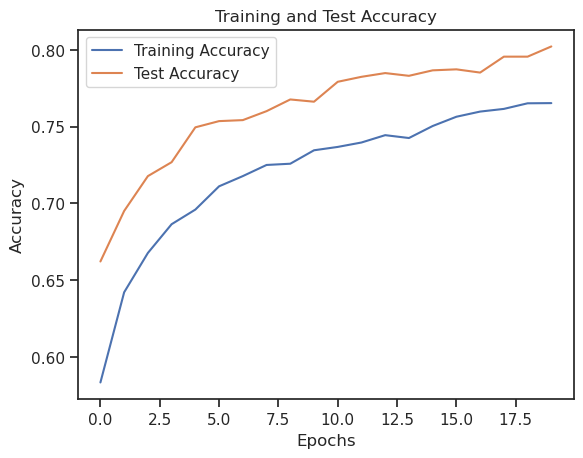

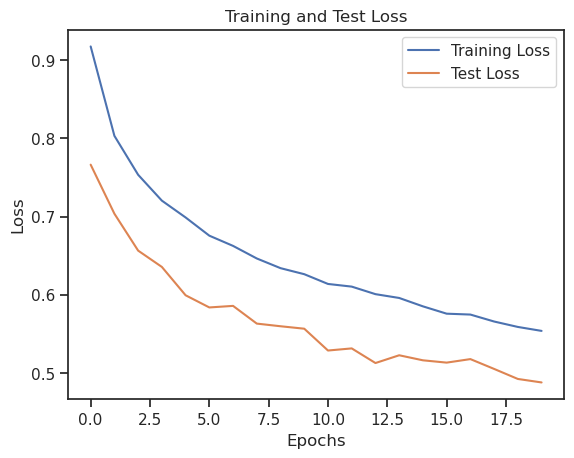

In [33]:
# Data
history = {
    'accuracy': [0.5833231806755066, 0.6420608758926392, 0.6676800847053528, 0.6864080429077148, 0.6959341764450073, 0.7110949158668518, 0.717742919921875, 0.7249990105628967, 0.7258096933364868, 0.7345656752586365, 0.7367546558380127, 0.7396327257156372, 0.7444160580635071, 0.7425513863563538, 0.750374972820282, 0.7564149498939514, 0.7597794532775879, 0.7615225315093994, 0.7651708722114563, 0.7652924656867981],
    'loss': [0.9176965951919556, 0.8033051490783691, 0.7534592747688293, 0.7203711867332458, 0.6988415122032166, 0.6755310297012329, 0.6624487638473511, 0.6463494300842285, 0.6339561343193054, 0.6262387633323669, 0.6137486100196838, 0.6103391051292419, 0.6006878614425659, 0.5958108305931091, 0.5850834250450134, 0.5757038593292236, 0.5745757222175598, 0.5656760334968567, 0.5587320923805237, 0.5536658763885498],
    'val_accuracy': [0.6621271371841431, 0.695038914680481, 0.7177367210388184, 0.7268158197402954, 0.7495136260986328, 0.7535668015480042, 0.7542153000831604, 0.7600519061088562, 0.7676718831062317, 0.7662127017974854, 0.7791828513145447, 0.7824254035949707, 0.7848573327064514, 0.783073902130127, 0.7866407036781311, 0.7872892618179321, 0.7851815819740295, 0.7955577373504639, 0.7955577373504639, 0.8022049069404602],
    'val_loss': [0.7663944959640503, 0.7036376595497131, 0.6564099788665771, 0.635523796081543, 0.5992541909217834, 0.5836825370788574, 0.5856809616088867, 0.5630100965499878, 0.559612512588501, 0.5564764738082886, 0.5285490155220032, 0.5312647819519043, 0.5125334858894348, 0.5224776268005371, 0.5160287022590637, 0.5130667686462402, 0.5175734758377075, 0.5050063729286194, 0.49216318130493164, 0.48769211769104004]
}

# Plot training and test accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and test loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()